In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Perfect sensor
def sense(x):
    return x

In [22]:
def simulate(Δt, x, u):
    # The control input is equal to the velocity of the robot
    dx = array(u)
    
    # Euler integration
    x += Δt * dx
    return x

In [27]:
def control(t, y):
    ### u(t) = K(pd − p(t))
    d = array([3., 3.])
    ux = (d[0] - y[0])
    uy = (d[1] - y[1])
    return array([ux, uy])

In [28]:
tf = 15.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([1., 2.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

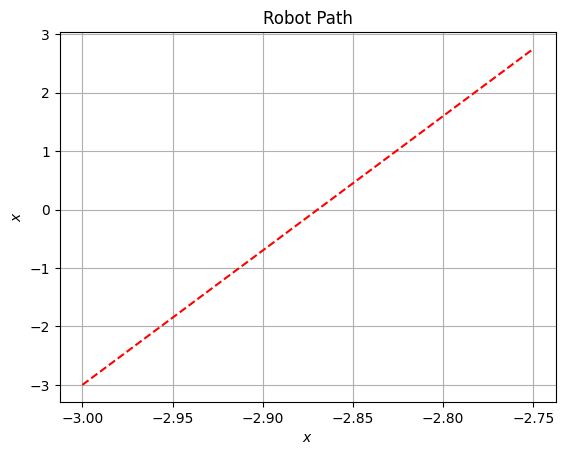

In [118]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x_log[:,0], x_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$x$")
ax.grid()

IndexError: index 152 is out of bounds for axis 0 with size 152

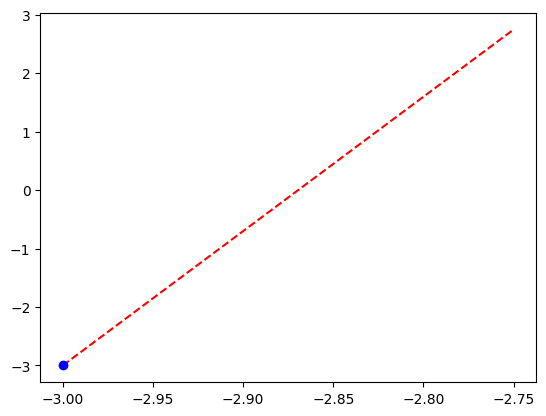

In [119]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

In [113]:
def control2(t, y):
    ### u(t) = K(pd − p(t))
    ds = [array([-2.75, 2.75]), array([3., -2.6]), array([2.8, 2.95]), array([0., 0.])]
    cnt = 0
    if t < 5:
        cnt = 0
    elif t < 10:
        cnt = 1
    elif t < 15:
        cnt = 2
    else:
        cnt = 3
    d = ds[cnt]
    ux = (d[0] - y[0])
    uy = (d[1] - y[1])
    return array([ux, uy])

In [114]:
tf = 20.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x2 = array([-3., -3.])
x2_log = [copy(x2)]
ds = [array([-2.75, 2.75]), array([3., -2.6]), array([2.8, 2.95]), array([0., 0.])]
cnt = 0

for t in time:
    y = sense(x2)
    u = control2(t, y,)    
    x2 = simulate(Δt, x2, u)
    x2_log.append(copy(x2))
    
x2_log = array(x2_log)

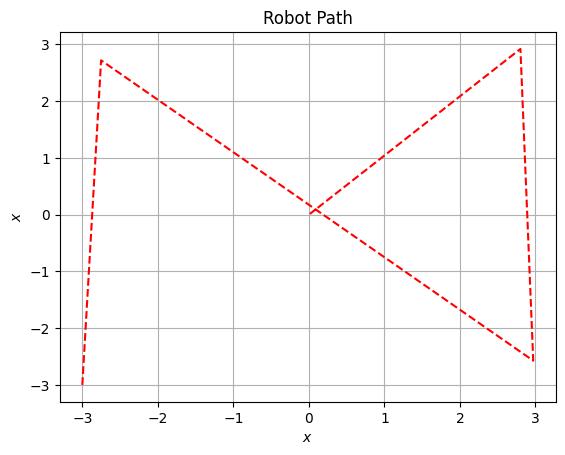

In [115]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x2_log[:,0], x2_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$x$")
ax.grid()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x2_log[:,0], x2_log[:,1], 'r--')
    
    # Initial conditions
    plot(x2_log[t,0], x2_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())